### Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Описание данных
Name — название игры  
Platform — платформа  
Year_of_Release — год выпуска  
Genre — жанр игры  
NA_sales — продажи в Северной Америке (миллионы проданных копий)  
EU_sales — продажи в Европе (миллионы проданных копий)  
JP_sales — продажи в Японии (миллионы проданных копий)  
Other_sales — продажи в других странах (миллионы проданных копий)  
Critic_Score — оценка критиков (максимум 100)  
User_Score — оценка пользователей (максимум 10)  
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board).  
Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  

### Изучаем датасет

In [1]:
#импорт необходимых библиотек
#Сброс ограничений на количество выводимых данных
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings
import statistics
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [2]:
data=pd.read_csv('/datasets/games.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Проверка дубликатов

In [5]:
print(data.duplicated().sum())

0


In [6]:
print(data['Genre'].value_counts().sort_index(ascending=True)) 
print(data['Platform'].value_counts().sort_index(ascending=True)) 
print(data['Name'].value_counts().sort_index(ascending=True)) 

Action          3369
Adventure       1303
Fighting         849
Misc            1750
Platform         888
Puzzle           580
Racing          1249
Role-Playing    1498
Shooter         1323
Simulation       873
Sports          2348
Strategy         683
Name: Genre, dtype: int64
2600     133
3DO        3
3DS      520
DC        52
DS      2151
GB        98
GBA      822
GC       556
GEN       29
GG         1
N64      319
NES       98
NG        12
PC       974
PCFX       1
PS      1197
PS2     2161
PS3     1331
PS4      392
PSP     1209
PSV      430
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii     1320
WiiU     147
X360    1262
XB       824
XOne     247
Name: Platform, dtype: int64
 Beyblade Burst                                                                                                                          1
 Fire Emblem Fates                                                                                                                       1
 Frozen: Ola

В выборке отсутвуют явные дубликаты, неявные дубликаты тоже не найдены, похожие названия игр являются разными частями/версиями игр. 

### Приводим названия столбцов к нижнему регистру

In [7]:
data.columns= data.columns.str.lower()

### Считаем суммарные продажи игр по всем регионам

In [8]:
data['sum_sales']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']
data.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


### Изучаем пропуски в данных

In [9]:
data.isna().sum() 

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
sum_sales             0
dtype: int64

In [10]:
data = data.dropna(subset=['year_of_release','genre','name'])
data.isna().sum() 

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
sum_sales             0
dtype: int64

Год выпуска игры, жанр и название игры невозможно восстановить по имеющимся данным, поэтому решено удалить строки с пропусками в этих столбцах. Пропуски в столбце с рейтингом решено оставить без изменений. 

### Заполняем пропуски в столбце user_score и critic_score и меняем типы данных

In [11]:
data['user_score'] = data['user_score'].fillna('-20')
data['critic_score'] = data['critic_score'].fillna('-20')
data['user_score'] = data['user_score'].replace(['tbd'],'-20')

try:
    data['user_score'] = data['user_score'].astype('float64',errors='ignore')
except:
    display('Не удалось  изменить тип данных столбца')
    

try:
    data[['critic_score','year_of_release']] = data[['critic_score','year_of_release']].astype('int64')
except:
    display('Не удалось  изменить тип данных столбца')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
 11  sum_sales        16444 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.6+ MB


Возможные причины пропусков: техническая ошибка (при получении данных из различных источников). Пропуски в столбце с рейтингом могут быть по причине того, что данный рейтинг используется только в США и Канаде. 

In [12]:
data['rating'] = data['rating'].fillna('Unknown') #загрушка на пустые значения в столбце рейтинг

In [13]:

temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  sum_sales        16444 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

### Время жизни платформы

In [14]:
data_grouped=data.pivot_table(index=['platform','year_of_release'],values='sum_sales')
data_grouped=data_grouped.unstack()

data_grouped.columns=[\
'1980','1981','1982','1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016']
                   
best_year = [data_grouped.columns[i].tolist() for i in data_grouped.values == data_grouped.max(axis=1)[:,None]]
data_grouped['best_year'] = best_year


worst_year = [data_grouped.columns[i].tolist() for i in data_grouped.values == data_grouped.min(axis=1)[:,None]]
data_grouped['worst_year'] = worst_year


data_grouped['max_sales'] = data_grouped.max(axis=1)
data_grouped['min_sales'] = data_grouped.min(axis=1)

def best_year_cal(row):
    return row['best_year'][0]

data_grouped['best_year']=data_grouped.apply(best_year_cal,axis=1)

def worts_year_cal(row):
    return row['worst_year'][0]

data_grouped['worst_year']=data_grouped.apply(worts_year_cal,axis=1)


try:
    data_grouped['best_year'] = data_grouped['best_year'].astype('float64',errors='ignore')
    data_grouped['worst_year'] = data_grouped['worst_year'].astype('float64',errors='ignore')
except:
    display('Не удалось  изменить тип данных столбца')
    
data_grouped_new=data_grouped[data_grouped['worst_year']>data_grouped['best_year']]
data_grouped_new=data_grouped_new[data_grouped['max_sales']>data_grouped['min_sales']*15 ]
data_grouped_new['live_term']=data_grouped_new['worst_year']-data_grouped_new['best_year']
live_term_median=data_grouped_new['live_term'].median()
print("Медианное время существования платформы:",live_term_median, "лет")



Медианное время существования платформы: 8.0 лет


Для анализа времени жизни платформы были взяты платформы, у которых уровень продаж упал более чем в 15 раз по сравнению с максимальным уровнем продаж на этой платформе. Медианным временем жизни платформы является 8 лет. 

### Выбираем анализируемый период

<AxesSubplot:>

<AxesSubplot:>

,sum
,sum_sales
platform,
2600,86.48
3DO,0.10
3DS,257.81
DC,15.95
DS,802.78
GB,254.43
GBA,312.88
GC,196.73


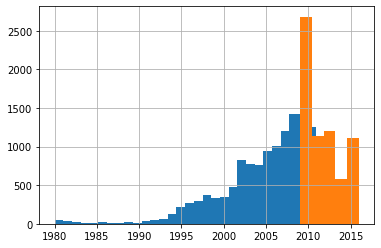

In [15]:
display(data['year_of_release'].hist(bins=35))
display(data['year_of_release'].hist(range=(2009,2016),bins=5))
data.pivot_table(index='platform', values='sum_sales',  aggfunc=['sum']).head(10)

C 1985 по 2008 наблюдается рост числа выпускаемых игр, с 2009 по 2011 наблюдается тенденция снижения числа выпускаемых игр. Поэтому считаю, что в исследовании необходимо учитывать данные за период с 2012 по 2016 год, где число выпускаемых игр было примерно на одном уровне.

### ТОП 5 платформ по числу продаж за период с 2012 по 2016

In [16]:

platform_stat = data.query('year_of_release>2011').pivot_table(index='platform', values='sum_sales',  aggfunc=['median'])
platform_stat.columns = ['sum_sales_median']
platform_stat=platform_stat.sort_values(by=['sum_sales_median'], ascending=False).head(5)
#display(platform_stat.index)
#print(platform_stat)


По  сумме продаж за период с 2012 по 2016 год лидируют следующие платформы: 
'X360', 'WiiU', 'XOne', 'PS4', 'PS3'. Для расчета использовали медиану продаж по каждой платформе. 

### Динамика продаж по лидирующим платформам за период с 2012 по 2016

In [17]:

def platform_graph(platform_name,data=data):
    data_platform=data.query('year_of_release>2011 & platform==@platform_name')
    ax=sns.boxplot(x=data_platform['year_of_release'], y=data_platform['sum_sales'])
    ax.set_title(platform_name)
    ax.set(ylim=(0, 4))
    ax.set(xlim=(0,6))

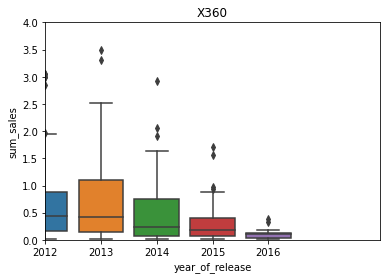

In [18]:
platform_graph('X360')

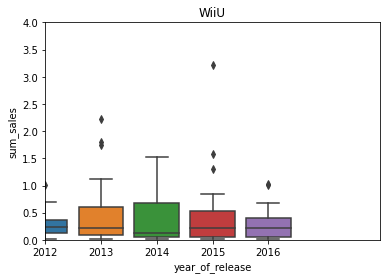

In [19]:
platform_graph('WiiU')

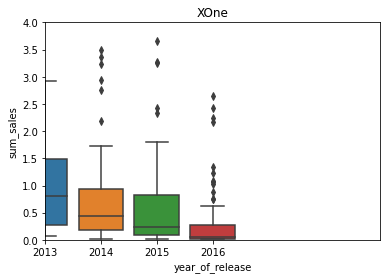

In [20]:
platform_graph('XOne')

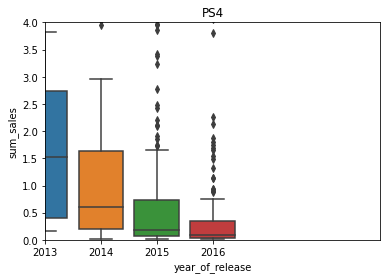

In [21]:
platform_graph('PS4')

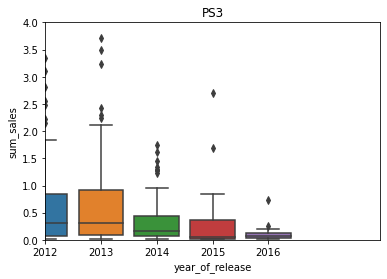

In [22]:
platform_graph('PS3') 

В целом с годами наблюдается тенденция снижения общих продаж по лидирующим платформам. Если обратить внимание на графики, то 2013-2014 года был прибыльным для платформ  'PS4', 'PS3', 'X360', '3DS', 'XOne'. Стабильный небольшой рост показывает платформа WiiU. 

### Глобальные продажи на различных платформах за период с 2012 по 2016

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


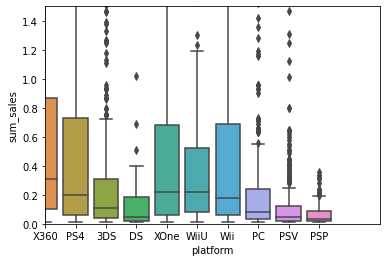

In [23]:
sum_sales = data.query('year_of_release>2011')["sum_sales"]
ax=sns.boxplot(x=data.query('year_of_release>2011')['platform'], y=sum_sales)
ax.set(ylim=(0, 1.5))
ax.set(xlim=(1, 12))
print(data['platform'].unique())

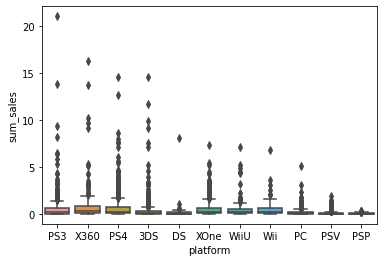

In [24]:
ax1=sns.boxplot(x=data.query('year_of_release>2011')['platform'], y=sum_sales)


У PS4,XOne и WiiU и Wii  медианная сумма продажи игр примерно одинаковая, немного выше медиана у X360. При этом имеют большой разброс в сумме продаж отдельных игр. Так как медиана находится ближе к нижней границе ящика с усами, значит есть отдельные единичные игры на данных платформах, имеющие большие продажи по сравнению с другими играми данной платформы. 

In [25]:
data_PS=data.query('year_of_release>2011')[data.query('year_of_release>2011')['platform']=='PS4']
print(data_PS.groupby('name')['sum_sales'].sum().sort_values(ascending=False).head(5))

data_XOne=data.query('year_of_release>2011')[data.query('year_of_release>2011')['platform']=='XOne']
print(data_XOne.groupby('name')['sum_sales'].sum().sort_values(ascending=False).head(5))

data_WiiU=data.query('year_of_release>2011')[data.query('year_of_release>2011')['platform']=='WiiU']
print(data_WiiU.groupby('name')['sum_sales'].sum().sort_values(ascending=False).head(5))

data_Wii=data.query('year_of_release>2011')[data.query('year_of_release>2011')['platform']=='Wii']
print(data_Wii.groupby('name')['sum_sales'].sum().sort_values(ascending=False).head(5))

data_X360=data.query('year_of_release>2011')[data.query('year_of_release>2011')['platform']=='X360']
print(data_X360.groupby('name')['sum_sales'].sum().sort_values(ascending=False).head(5))

name
Call of Duty: Black Ops 3         14.63
Grand Theft Auto V                12.62
FIFA 16                            8.58
Star Wars Battlefront (2015)       7.98
Call of Duty: Advanced Warfare     7.66
Name: sum_sales, dtype: float64
name
Call of Duty: Black Ops 3         7.39
Grand Theft Auto V                5.47
Call of Duty: Advanced Warfare    5.26
Halo 5: Guardians                 4.49
Fallout 4                         4.22
Name: sum_sales, dtype: float64
name
Mario Kart 8                           7.09
New Super Mario Bros. U                5.23
Super Smash Bros. for Wii U and 3DS    4.87
Splatoon                               4.44
Nintendo Land                          4.42
Name: sum_sales, dtype: float64
name
Just Dance 4             6.76
Just Dance 2014          3.58
Mario Party 9            3.13
Skylanders Giants        2.52
Skylanders SWAP Force    2.15
Name: sum_sales, dtype: float64
name
Grand Theft Auto V            16.27
Call of Duty: Black Ops II    13.68
Call of Du

Можно заметить, что есть 2-3 игры на платформах PS4,XOne, WiiU, Wii и X360, которые имеют гораздо большие продажи по сравнению с другими играми данной платформы. 

### Влияние отзывов пользователей и критиков на продажи 

Для анализа корреляции между продажами и оценкой пользователей и критиков рассмотрим платформы 'PS4','XOne', 'WiiU', 'Wii','X360'.

Коэффициент корреляции между продажами и оценками критиков для PS4 равен 0.41
Коэффициент корреляции между продажами и оценками пользователей для PS4 равен -0.03
Коэффициент корреляции между продажами и оценками критиков для XOne равен 0.42
Коэффициент корреляции между продажами и оценками пользователей для XOne равен -0.07
Коэффициент корреляции между продажами и оценками критиков для WiiU равен 0.35
Коэффициент корреляции между продажами и оценками пользователей для WiiU равен 0.4
Коэффициент корреляции между продажами и оценками критиков для Wii равен -0.42
Коэффициент корреляции между продажами и оценками пользователей для Wii равен 0.3
Коэффициент корреляции между продажами и оценками критиков для X360 равен 0.36
Коэффициент корреляции между продажами и оценками пользователей для X360 равен 0.01


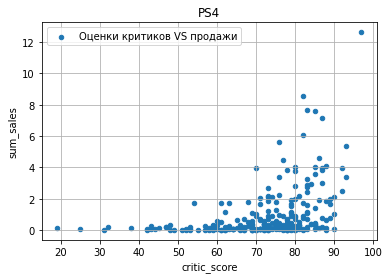

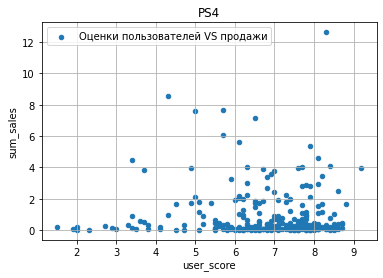

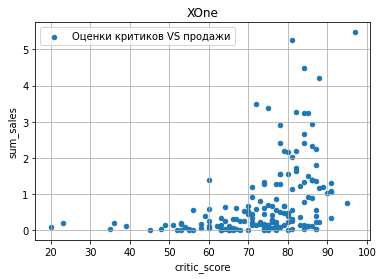

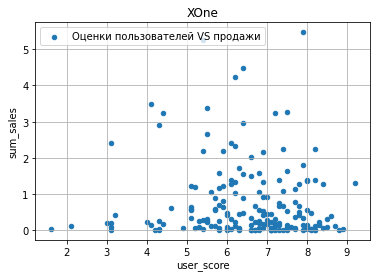

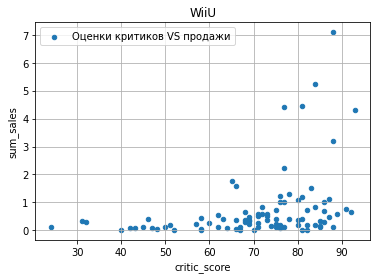

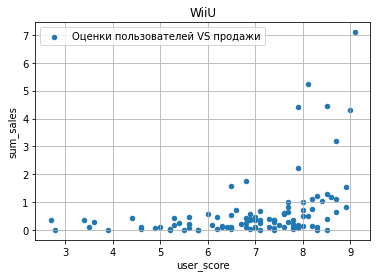

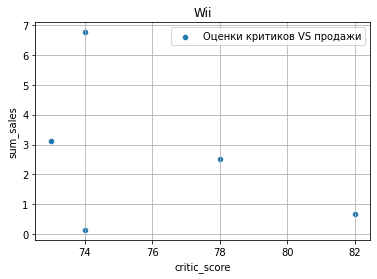

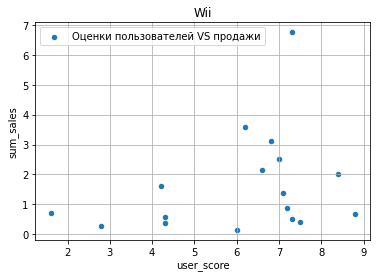

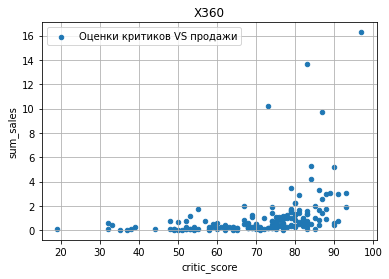

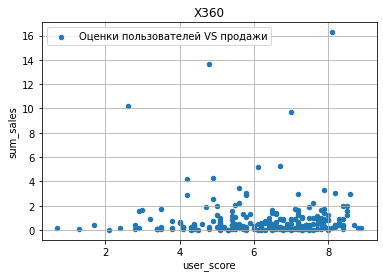

In [26]:
platform_list=['PS4','XOne', 'WiiU', 'Wii','X360']
corr_critic_score_mass=[]
corr_user_score_mass=[]
for i in platform_list:
    data_critic_score=data.query('year_of_release > 2011 & critic_score!=-20 & platform == @i')
    data_user_score=data.query('year_of_release > 2011 & user_score!=-20 & platform == @i')
    data_critic_score.plot(x='critic_score', y='sum_sales', kind='scatter', sharex=False, grid=True,label='Оценки критиков VS продажи',title=i)
    data_user_score.plot(x='user_score', y='sum_sales', kind='scatter', sharex=False, grid=True,label='Оценки пользователей VS продажи',title=i)
    corr_critic_score=data_critic_score['critic_score'].corr(data_critic_score['sum_sales'])
    corr_user_score=data_user_score['user_score'].corr(data_user_score['sum_sales'])
    print('Коэффициент корреляции между продажами и оценками критиков для', i, 'равен', corr_critic_score.round(2))
    print('Коэффициент корреляции между продажами и оценками пользователей для', i, 'равен', corr_user_score.round(2))
    #corr_critic_score_mass.append(corr_critic_score)
    #corr_user_score_mass.append(corr_user_score)
#print("Коэффициент корреляции между продажами и оценками критиков:",statistics.median(corr_critic_score_mass))
#print("Коэффициент корреляции между продажами и оценками пользователей:",statistics.median(corr_user_score_mass))

Зависимость суммы продаж от оценки критиков слабая, коэффициент корреляции 0.36.   
Корреляция между оценкой пользователей и суммой продаж очень слабая (коэффициент корреляции 0.006).  
Оценивали на примере платформ 'PS4','XOne', 'WiiU', 'Wii','X360'.

### Топ5 жанров по сумме продаж за период с 2012 по 2016

              sum_sales
genre                  
Shooter            0.44
Sports             0.24
Platform           0.21
Role-Playing       0.14
Racing             0.14


[(0.0, 6.0)]

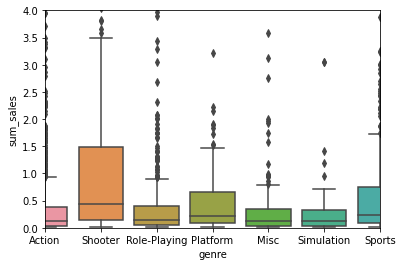

In [27]:

genre_stat = data.query('year_of_release>2011').pivot_table(index='genre', values='sum_sales',  aggfunc=['median'])
genre_stat.columns = ['sum_sales']
genre_stat=genre_stat.sort_values(by=['sum_sales'], ascending=False).head(5)
#genre_stat['genre']=genre_stat.index

print(genre_stat)

#genre_stat.plot.bar(x='genre',y='sum_sales',figsize=(10, 10))

genre_sum_sales = data.query('year_of_release>2011')['sum_sales']
ax=sns.boxplot(x=data.query('year_of_release>2011')['genre'], y=genre_sum_sales)
ax.set(ylim=(0, 4))
ax.set(xlim=(0,6))

В топ5 жанров с максимальной суммой продаж входят следующие жанры:Shooter,Sports,Platform,Role-Playing,Racing.  

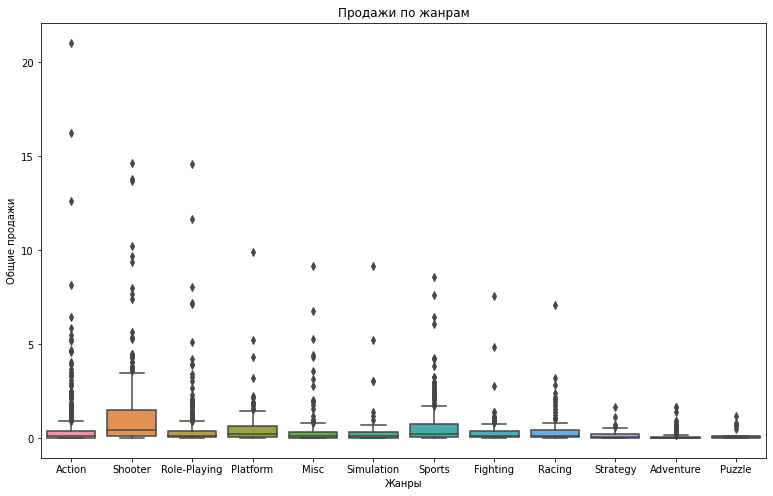

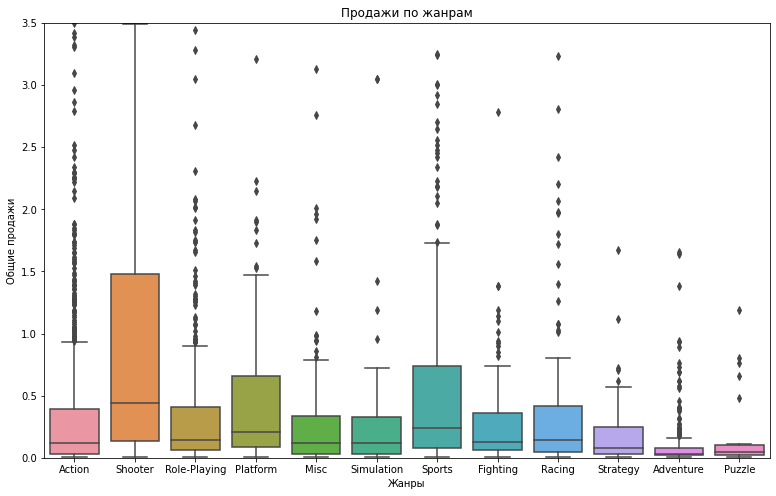

In [28]:


data_temp, y = data.query('year_of_release>2011').copy(), 'sum_sales'
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='genre')
    .set(title = 'Продажи по жанрам', xlabel = 'Жанры', ylabel = 'Общие продажи'))
plt.show()
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='genre')
    .set(title = 'Продажи по жанрам', xlabel = 'Жанры', ylabel = 'Общие продажи', ylim=(0, 3.5)))
plt.show()

### Проверка гипотез

Для проверки двух гипотез будет использован двусторонний t-тест Стьюдента.

#### Проверка гипотезы 1.

Нулевая гипотеза:  
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  

Альтернативная гипотеза:  
Средние пользовательские рейтинги платформ Xbox One и PC разные.  

In [29]:
sample_1=data.query( 'user_score!=-20 & year_of_release>2011')[data.query('user_score!=-20 & year_of_release>2011')['platform'] =='PC']['user_score']
sample_2=data.query('user_score!=-20  & year_of_release>2011')[data.query('user_score!=-20  & year_of_release>2011')['platform'] =='XOne']['user_score']

print(sample_1.describe())
print(sample_2.describe())

alpha = .05  #задаем уровень значимости 


results = st.ttest_ind(
    sample_1, 
    sample_2,equal_var = True)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

count    206.000000
mean       6.428641
std        1.664465
min        1.400000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64
count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64
p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


В результате анализа не получилось отвергнуть нулевую гипотез, значит считаем ее верной, то есть средний пользовательский рейтинг платформ Xbox One и PC одинаковый. 

#### Проверка гипотезы 2

Нулевая гипотеза:  
Средние пользовательские рейтинги жанров Action и Sports одинаковый.  

Альтернативная гипотеза:  
Средние пользовательские рейтинги жанров Action и Sports разный.    


In [30]:
sample_1=data.query( 'user_score!=-20 & year_of_release>2011')[data.query( 'user_score!=-20  & year_of_release>2011')['genre'] =='Action']['user_score']
sample_2=data.query( 'user_score!=-20 & year_of_release>2011')[data.query( 'user_score!=-20  & year_of_release>2011')['genre'] =='Sports']['user_score']

print(sample_1.describe())
print(sample_2.describe())

alpha = .05  #задаем уровень значимости 


results = st.ttest_ind(
    sample_1, 
    sample_2,equal_var = True)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

count    523.000000
mean       6.825048
std        1.374440
min        1.600000
25%        6.250000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64
count    195.000000
mean       5.455897
std        1.738646
min        0.200000
25%        4.300000
50%        5.700000
75%        6.800000
max        8.800000
Name: user_score, dtype: float64
p-значение: 3.7163089460934874e-26
Отвергаем нулевую гипотезу


В результате анализа отвергаем нулевую гипотезу, альтернативную гипотезу считаем верной, то есть средние пользовательские рейтинги жанров Action и Sports разный. 

### Портрет пользователя каждого региона

In [31]:
def top5_by_region(region,column):
    region_stat = data.query('year_of_release>2011').pivot_table(index=column, values=region+'_sales',  aggfunc=['sum'])
    region_stat.columns=['sum']
    region_stat=region_stat.sort_values(by='sum',ascending=False).head(5)
    region_stat.plot(y='sum', kind='pie',legend=False);
    return region_stat

#### Самые популярные платформы в Северной Америке

             sum
platform        
X360      140.05
PS4       108.74
PS3       103.38
XOne       93.12
3DS        55.31


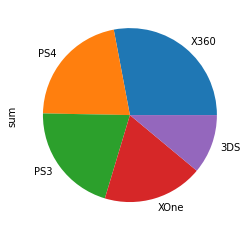

In [32]:
print(top5_by_region('na','platform'))

#### Самые популярные жанры в Северной Америке

                 sum
genre               
Action        177.84
Shooter       144.77
Sports         81.53
Role-Playing   64.00
Misc           38.19


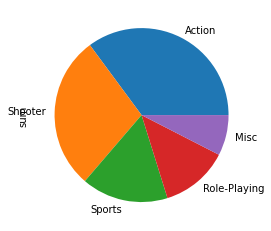

In [33]:
print(top5_by_region('na','genre'))

#### Влияет ли рейтинг ESRB на продажи в Северной Америке?

            sum
rating         
M        231.57
E        114.37
Unknown  103.31
E10+      75.70
T         66.02


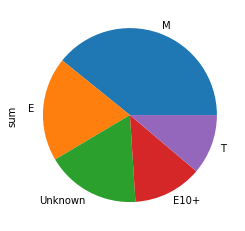

In [34]:
print(top5_by_region('na','rating'))

Для Северной Америки:  
    Самые популярные платформы: X360,PS4,PS3   
    Самые попурные жанры: Action,Shooter,Sports  
В Северной Америке чаще всего играю в игры:   
игры для лиц старше 17 лет 
игры для всех возрастов.

#### Самые популярные платформы в Европе

             sum
platform        
PS4       141.09
PS3       106.86
X360       74.52
XOne       51.59
3DS        42.64


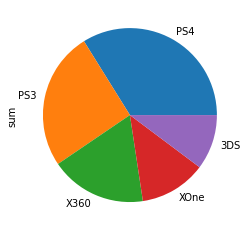

In [35]:
print(top5_by_region('eu','platform'))

#### Самые популярные жанры в Европе

                 sum
genre               
Action        159.34
Shooter       113.47
Sports         69.09
Role-Playing   48.53
Racing         27.29


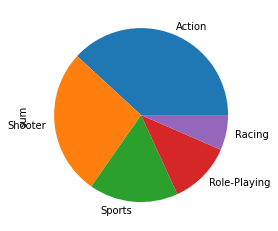

In [36]:
print(top5_by_region('eu','genre'))

#### Влияет ли рейтинг ESRB на продажи в Европе?

            sum
rating         
M        193.96
E        113.03
Unknown   91.50
E10+      55.37
T         52.96


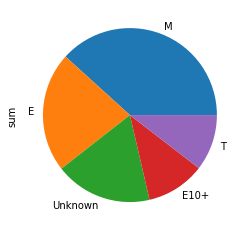

In [37]:
print(top5_by_region('eu','rating'))

Для  Европе:  
    Самые популярные платформы:PS4,PS3,X360      
    Самые попурные жанры: Action,Shooter,Sports    
В Европе чаще всего играю в игры:    
игры для лиц старше 17 лет    
игры для всех возрастов.
      

#### Самые популярные платформы в Японии

            sum
platform       
3DS       87.79
PS3       35.29
PSV       21.04
PS4       15.96
WiiU      13.01


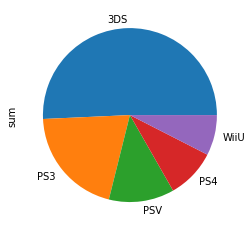

In [38]:
print(top5_by_region('jp','platform'))

#### Самые популярные жанры в Японии

                sum
genre              
Role-Playing  65.44
Action        52.80
Misc          12.86
Simulation    10.41
Fighting       9.44


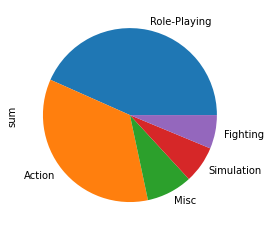

In [39]:
print(top5_by_region('jp','genre'))

#### Влияет ли рейтинг ESRB на продажи в Японии?

            sum
rating         
Unknown  108.84
E         28.33
T         26.02
M         21.20
E10+       8.19


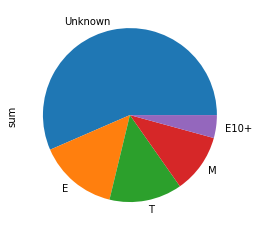

In [40]:
print(top5_by_region('jp','rating'))

Для  Японии:  
    Самые популярные платформы: 3DS,PS3,PSV  
    Самые попурные жанры: Role-Playing, Action,Sports   
В Японии чаще всего играю в игры:    
      игры для всех возрастов    
      игры для лиц старше 13 лет   
Так как в Японии рейтинг ESRB не используется, то у нас на первом месте по количеству - игры где не указан рейтинг ESRB. 

In [41]:

temp = data.query('year_of_release>2011').copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


Unknown    1275
M           498
T           412
E           395
E10+        306
Name: rating, dtype: int64

Предпочтения игроков из Европы и Северной Америки очень похожи, предпочтения игроков из Японии от них отличаются. 

### Вывод
За период с 2012 по 2016 год наблюдается динамика снижения общих продаж на лидирующих платформах.   
В среднем платформа живет 8 лет.  
По сумме продаж за период с 2012 по 2016 год лидируют следующие платформы: 'X360', 'WiiU'.   
Платформа WiiU показывает стабильный рост в последние годы.   
По сумме продаж лидируют следующие жанры:Shooter,Sports.     
Отзывы критиков и пользователей не сильно влияют на продажи.   
Предпочтения игроков из Европы и Северной Америки очень похожи, предпочтения игроков из Японии от них отличаются.    
Согласно проверке гипотез пришли к следующему:    
    средние пользовательские рейтинги платформ Xbox One и PC одинаковые.    
    средние пользовательские рейтинги жанров Action и Sports разные.   
